In [56]:
%matplotlib inline
import analysis
import matplotlib
import warnings
import logging
import sys
from importlib import reload
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.ERROR, stream=sys.stdout)

reload(analysis)

a = analysis.Analysis()
a.log.setLevel(logging.INFO)
#a.log.setLevel(logging.DEBUG)


/home/tuscho01/charms/python_graphs/lab-charms/lib/jujubench/util.py:51: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(yml.read())


In [57]:
result = '../spa_result/CSV_logs/Topdown/1624484043.193352.csv'
sns.set_style('darkgrid')
plt.rcParams["figure.figsize"] = figsize=(20, 5)
plt.rcParams["figure.dpi"] = dpi=100
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14

sns.set_palette('husl', 8)
analysis.css_styling()


In [51]:
df = pd.read_csv(result)

print(df)

                          Events                        Alias      Names Values_list        Values    Timestamps           Machine          Kernel System                                     Release                                 Command
0                        SW_INCR                      SW_INCR  Baseline2      [0, 0]  0.000000e+00  1.624484e+09  ip-192-168-99-71  5.4.0-1009-aws  Linux  #9-Ubuntu SMP Sun Apr 12 19:42:55 UTC 2020  ../../mymodel1600/mymodel/higgs 1 1000
1               L1I_CACHE_REFILL             L1I_CACHE_REFILL  Baseline2      [0, 0]  1.252047e+07  1.624484e+09  ip-192-168-99-71  5.4.0-1009-aws  Linux  #9-Ubuntu SMP Sun Apr 12 19:42:55 UTC 2020  ../../mymodel1600/mymodel/higgs 1 1000
2                 L1I_TLB_REFILL               L1I_TLB_REFILL  Baseline2      [0, 0]  1.345376e+06  1.624484e+09  ip-192-168-99-71  5.4.0-1009-aws  Linux  #9-Ubuntu SMP Sun Apr 12 19:42:55 UTC 2020  ../../mymodel1600/mymodel/higgs 1 1000
3               L1D_CACHE_REFILL             L1D

 # Performance Metric Grpahs


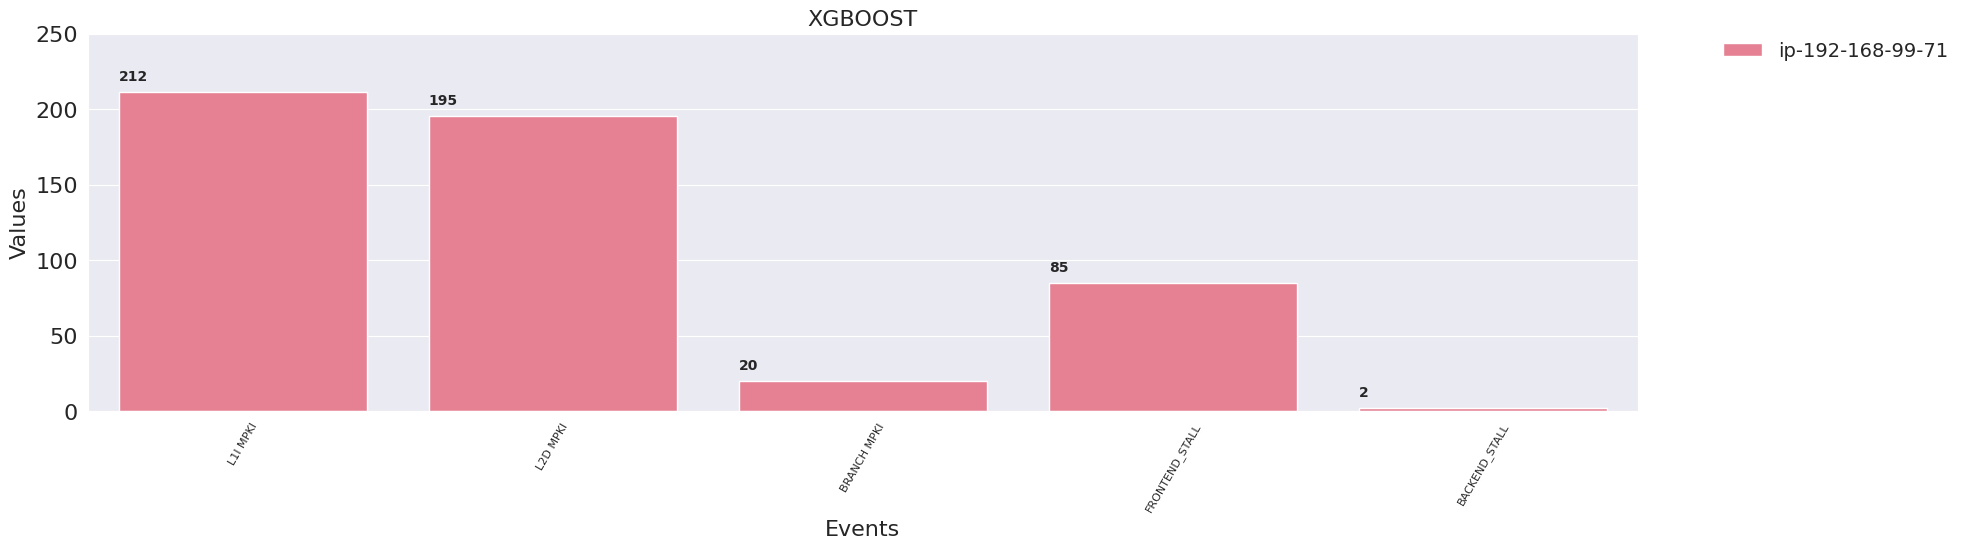

In [52]:
df = df.query('Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL"')


ax, tmp = a.graph('Events', 'Values',key_cols=['Machine'],do_not_sort = True, title = ('XGBOOST'),
        xlabel='Events',ylabel='Values' , label = True, data = df, kind = 'bar')

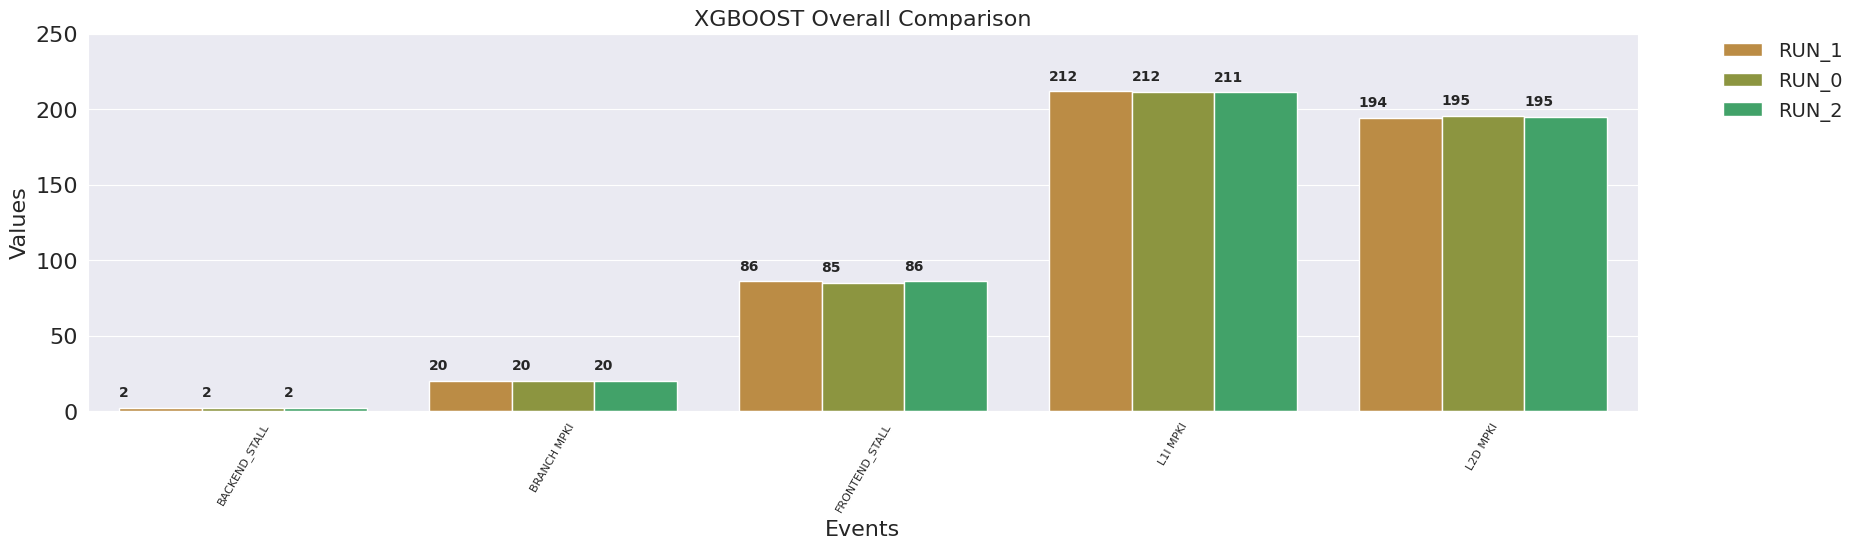

In [53]:
result = '../spa_result/Analysis_Results/stat_analysis_1624484750.170771'
df = pd.read_csv(result)
df = df.query('Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL"')


ax, tmp = a.graph('Events', 'Values',key_cols=['Runs'],do_not_sort = True, title = ('XGBOOST Overall Comparison'),
        xlabel='Events',ylabel='Values' , label = True, data = df, kind = 'bar')



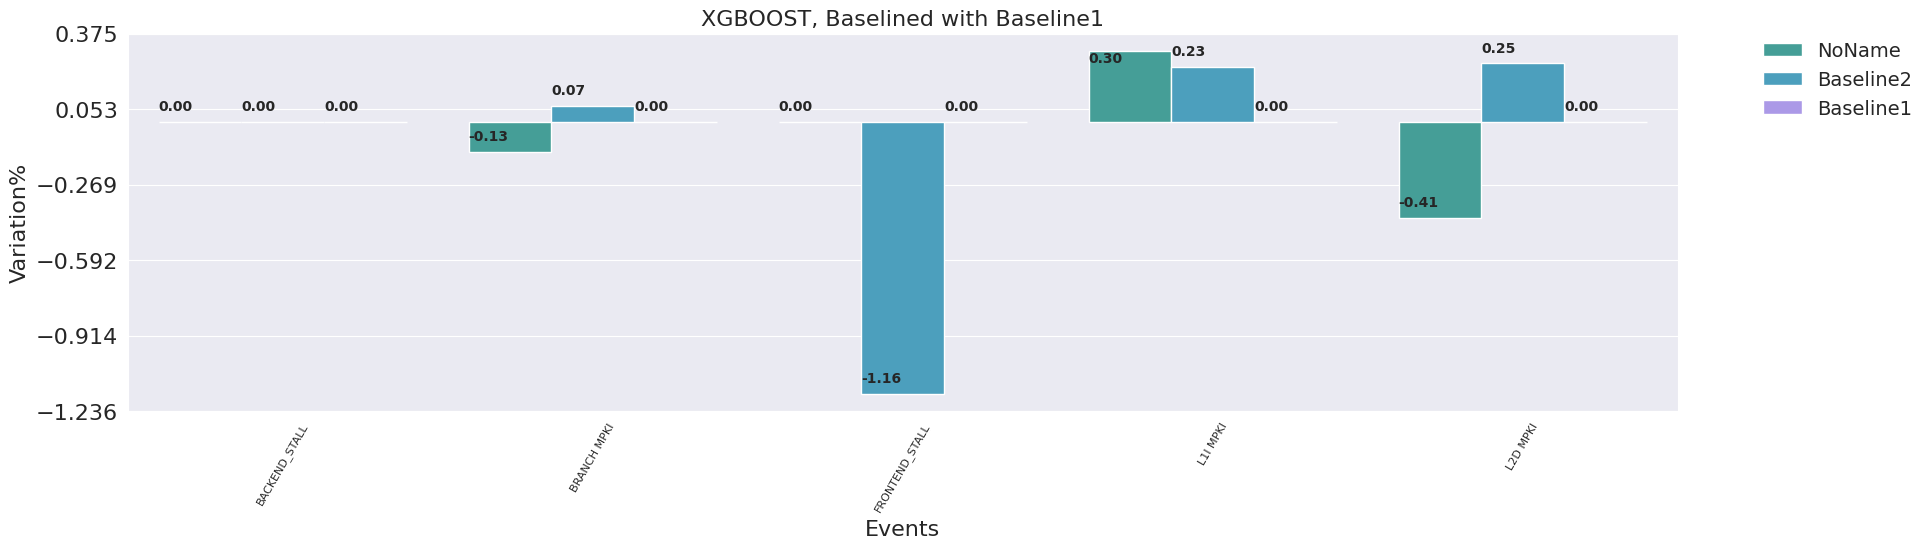

In [54]:
result = '../spa_result/Analysis_Results/stat_analysis_1624484755.324127'
df = pd.read_csv(result)
df = df.query('Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL"')
df.dropna(inplace=True)

ax, tmp = a.graph('Events', 'BVariation%',key_cols=['Names'],do_not_sort = True, title = ('XGBOOST, Baselined with Baseline1'),
        xlabel='Events',ylabel='Variation%' , label = True, data = df, kind = 'bar')


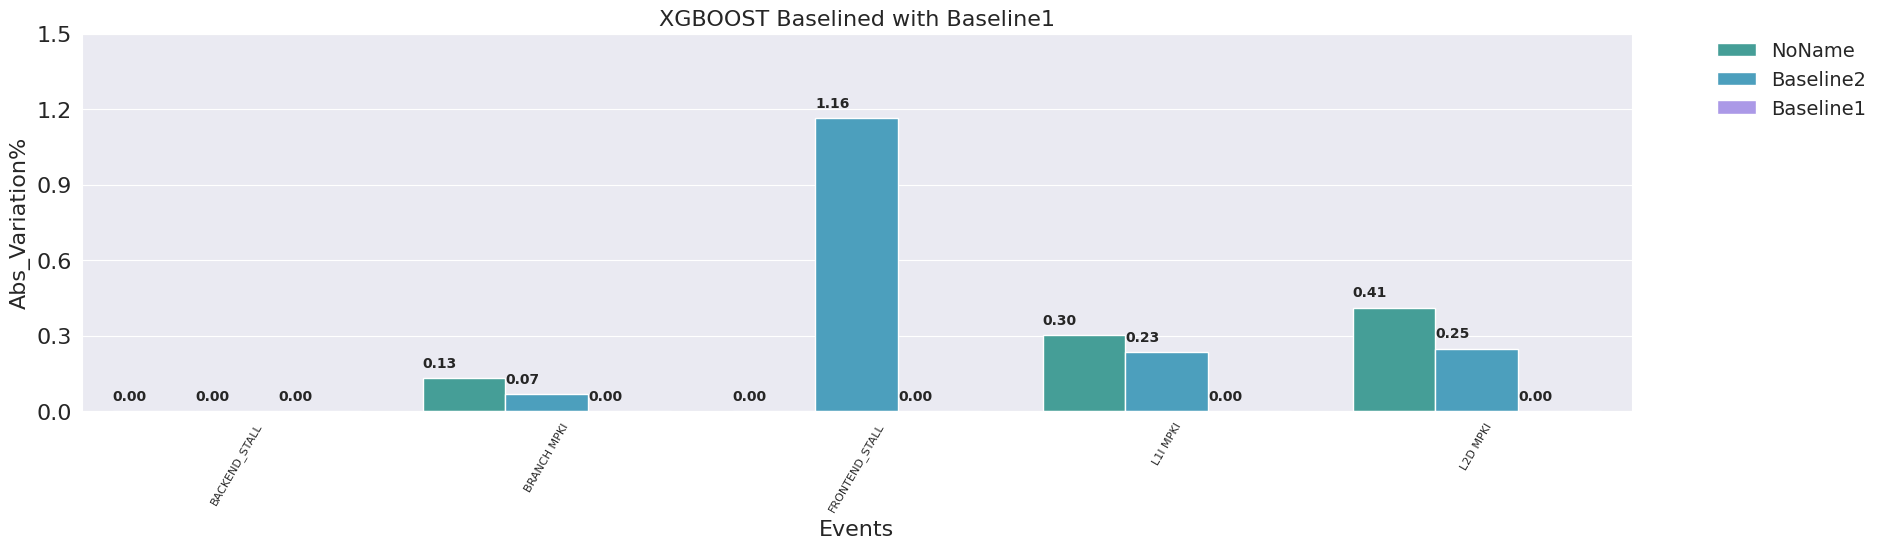

In [55]:
ax, tmp = a.graph('Events', 'BAbsVariation%',key_cols=['Names'],do_not_sort = True, title = ('XGBOOST Baselined with Baseline1'),
        xlabel='Events',ylabel='Abs_Variation%' , label = True, data = df, kind = 'bar')

             Events           Alias            Names   Runs      Values
6     BACKEND_STALL   BACKEND_STALL        Baseline2  RUN_1    2.000000
7     BACKEND_STALL   BACKEND_STALL  Base_10000_iter  RUN_4    2.000000
9     BACKEND_STALL   BACKEND_STALL        Baseline1  RUN_3    2.000000
11      BRANCH MPKI     BRANCH MPKI        Baseline2  RUN_1   19.974614
13      BRANCH MPKI     BRANCH MPKI  Base_10000_iter  RUN_4   20.849576
14      BRANCH MPKI     BRANCH MPKI        Baseline1  RUN_3   19.961136
207  FRONTEND_STALL  FRONTEND_STALL  Base_10000_iter  RUN_4   87.000000
208  FRONTEND_STALL  FRONTEND_STALL        Baseline2  RUN_1   85.000000
209  FRONTEND_STALL  FRONTEND_STALL        Baseline1  RUN_3   86.000000
345        L1I MPKI        L1I MPKI        Baseline1  RUN_3  211.043822
346        L1I MPKI        L1I MPKI        Baseline2  RUN_1  211.537149
348        L1I MPKI        L1I MPKI  Base_10000_iter  RUN_4  220.833270
380        L2D MPKI        L2D MPKI        Baseline2  RUN_1  195

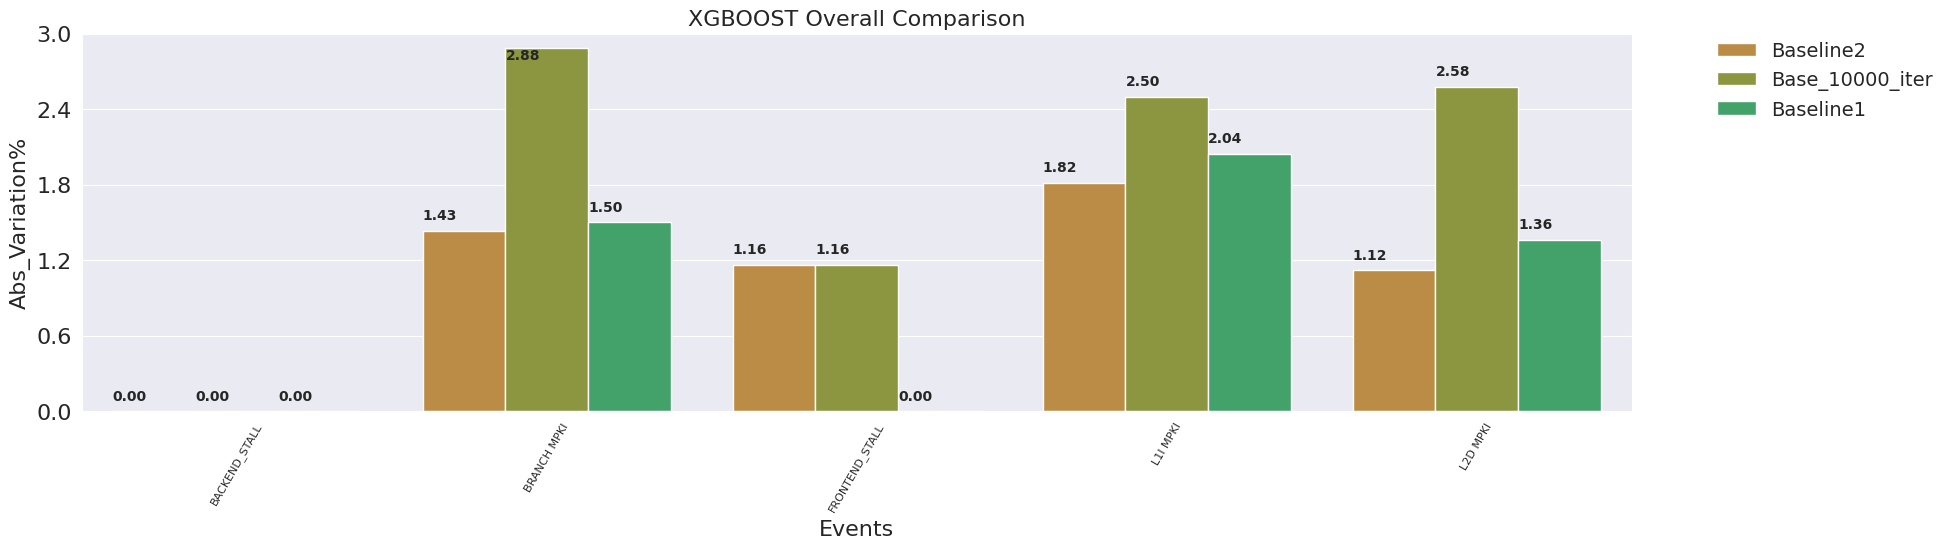

In [73]:
result = '../spa_result/Analysis_Results/stat_analysis_1624491233.305313'
df = pd.read_csv(result)
df = df.query('(Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL") and Names != "NoName"')
df.dropna(inplace=True)
#print(df)
print(df[['Events','Alias','Names','Runs','Values']])

ax, tmp = a.graph('Events', 'AbsVariation%',key_cols=['Names'],do_not_sort = True, title = ('XGBOOST Overall Comparison'),
        xlabel='Events',ylabel='Abs_Variation%' , label = True, data = df, kind = 'bar')

     Unnamed: 0          Events           Alias            Names Values_list      Values    Timestamps           Machine          Kernel System                                     Release                                  Command   Runs  BAbsVariation%  BVariation%
6           117   BACKEND_STALL   BACKEND_STALL        Baseline2      [0, 0]    2.000000  1.624484e+09  ip-192-168-99-71  5.4.0-1009-aws  Linux  #9-Ubuntu SMP Sun Apr 12 19:42:55 UTC 2020   ../../mymodel1600/mymodel/higgs 1 1000  RUN_1        0.000000     0.000000
7           117   BACKEND_STALL   BACKEND_STALL  Base_10000_iter      [0, 0]    2.000000  1.624490e+09  ip-192-168-99-71  5.4.0-1009-aws  Linux  #9-Ubuntu SMP Sun Apr 12 19:42:55 UTC 2020  ../../mymodel1600/mymodel/higgs 1 10000  RUN_4        0.000000     0.000000
9           117   BACKEND_STALL   BACKEND_STALL        Baseline1      [0, 0]    2.000000  1.624484e+09  ip-192-168-99-71  5.4.0-1009-aws  Linux  #9-Ubuntu SMP Sun Apr 12 19:42:55 UTC 2020   ../../mymodel16

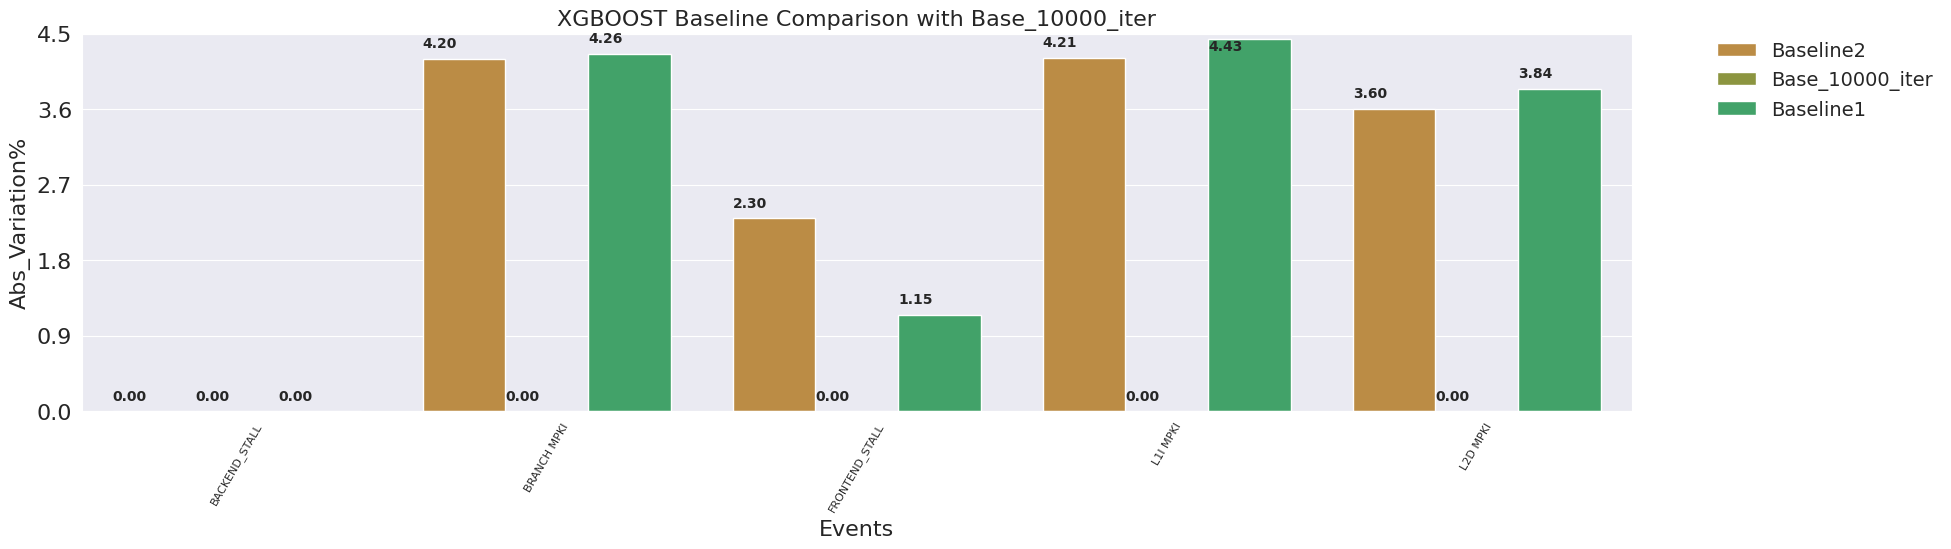

In [65]:
result = '../spa_result/Analysis_Results/stat_analysis_1624491263.184397'
df = pd.read_csv(result)
df = df.query('(Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL") and Names != "NoName"')
df.dropna(inplace=True)
print(df)
ax, tmp = a.graph('Events', 'BAbsVariation%',key_cols=['Names'],do_not_sort = True, title = ('XGBOOST Baseline Comparison with Base_10000_iter'),
        xlabel='Events',ylabel='Abs_Variation%' , label = True, data = df, kind = 'bar')

None
            Events           Alias            Names   Runs  BAbsVariation%  BVariation%
0    BACKEND_STALL   BACKEND_STALL        Baseline2  RUN_1        0.000000     0.000000
1    BACKEND_STALL   BACKEND_STALL  Base_10000_iter  RUN_4        0.000000     0.000000
2    BACKEND_STALL   BACKEND_STALL        Baseline1  RUN_3        0.000000     0.000000
3      BRANCH MPKI     BRANCH MPKI        Baseline2  RUN_1        4.196545    -4.196545
4      BRANCH MPKI     BRANCH MPKI  Base_10000_iter  RUN_4        0.000000     0.000000
5      BRANCH MPKI     BRANCH MPKI        Baseline1  RUN_3        4.261190    -4.261190
6   FRONTEND_STALL  FRONTEND_STALL  Base_10000_iter  RUN_4        0.000000     0.000000
7   FRONTEND_STALL  FRONTEND_STALL        Baseline2  RUN_1        2.298851    -2.298851
8   FRONTEND_STALL  FRONTEND_STALL        Baseline1  RUN_3        1.149425    -1.149425
9         L1I MPKI        L1I MPKI        Baseline1  RUN_3        4.432959    -4.432959
10        L1I MPKI        L

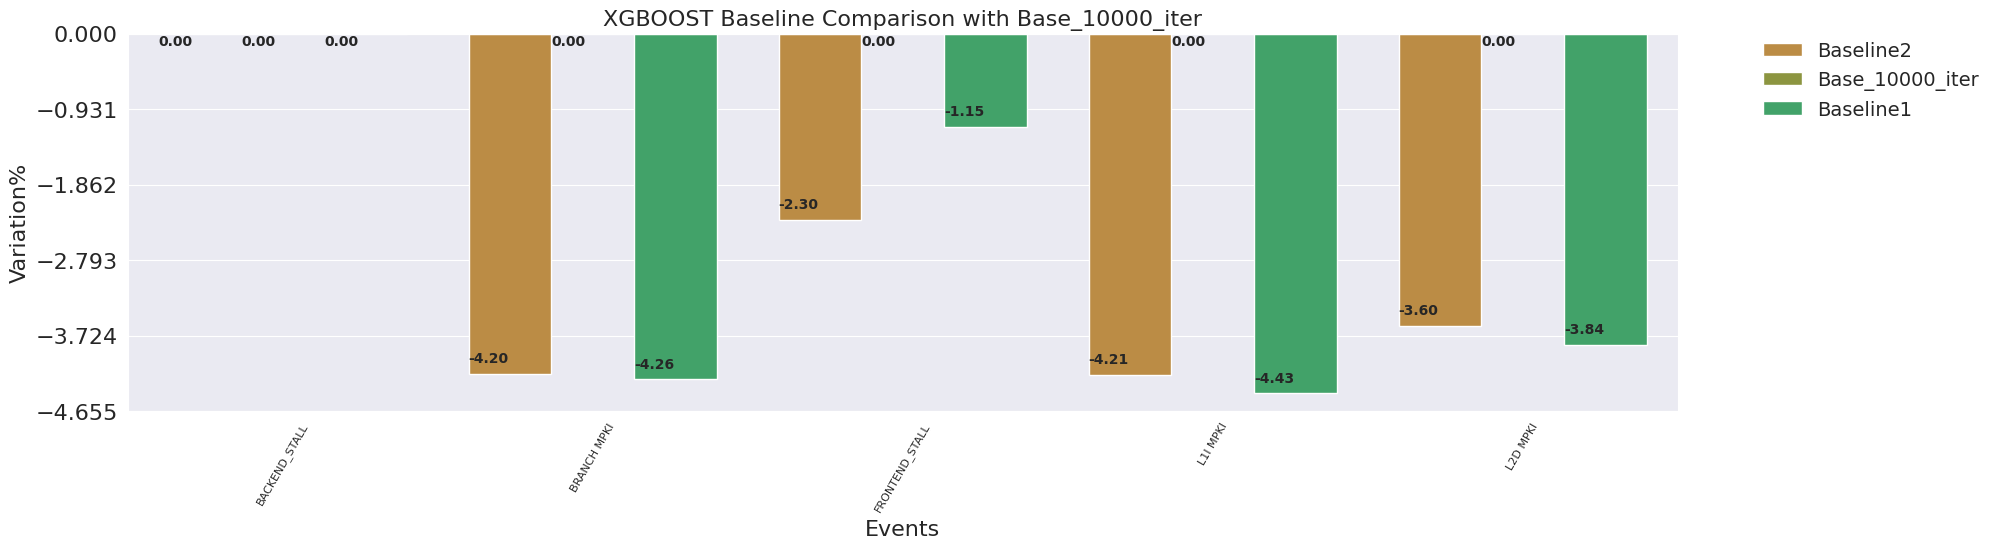

In [71]:
result = '../spa_result/Analysis_Results/stat_analysis_1624491263.184397'
df = pd.read_csv(result)
df = df.query('(Events == "FRONTEND_STALL" or Events == "BRANCH MPKI" or Events == "L2D MPKI" or Events == "L1I MPKI" or Events == "BACKEND_STALL") and Names != "NoName"')
df.dropna(inplace=True)
print(df.reset_index(inplace=True))
print(df[['Events','Alias','Names','Runs','BAbsVariation%','BVariation%']])
ax, tmp = a.graph('Events', 'BVariation%',key_cols=['Names'],do_not_sort = True, title = ('XGBOOST Baseline Comparison with Base_10000_iter'),
        xlabel='Events',ylabel='Variation%' , label = True, data = df, kind = 'bar')